In [2]:
import utils
import dotenv
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [3]:
dotenv.load_dotenv()

True

In [4]:
df = pd.read_csv(f'{os.getenv("ROOT_DIR")}\\data\\finalrefined.csv')

In [5]:
df

,subject_id,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,...,discharge_location_OTHER FACILITY,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF,discharge_location_SNF-MEDICAID ONLY CERTIF,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay
0,3,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,...,False,False,False,True,False,False,False,True,False,False
1,9,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,...,False,False,False,False,False,False,True,False,False,False
2,21,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,...,False,False,False,False,False,False,False,True,False,False
3,25,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,...,False,False,False,False,False,False,False,False,True,False
4,31,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,99913,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,...,False,False,False,False,False,False,False,True,False,False
10189,99922,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,...,False,False,False,False,False,False,False,True,False,False
10190,99923,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,...,False,False,False,False,False,False,False,False,True,False
10191,99944,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,...,False,False,False,True,False,False,False,True,False,False


In [6]:
df_subject_mr = utils.aggregate_score_to_mortality()
df_subject_mr

Connected to the PostgreSQL database
PostgreSQL version: PostgreSQL 14.0, compiled by Visual C++ build 1914, 64-bit


,subject_id,mr_lods
0,25225,0.104107
1,15574,0.048017
2,52619,0.048017
3,85940,0.048017
4,12411,0.288948
...,...,...
61046,3793,0.149936
61047,11099,0.288948
61048,93831,0.071114
61049,50334,0.104107


In [7]:
df = df.merge(df_subject_mr.drop_duplicates(subset='subject_id'), on='subject_id', how='left')
df

,subject_id,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,...,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF,discharge_location_SNF-MEDICAID ONLY CERTIF,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,mr_lods
0,3,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,...,False,False,True,False,False,False,True,False,False,0.683240
1,9,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,...,False,False,False,False,False,True,False,False,False,0.149936
2,21,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,...,False,False,False,False,False,False,True,False,False,0.483531
3,25,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,...,False,False,False,False,False,False,False,True,False,0.288948
4,31,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,...,False,False,False,False,False,False,True,False,False,0.104107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,99913,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,...,False,False,False,False,False,False,True,False,False,0.149936
10189,99922,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,...,False,False,False,False,False,False,True,False,False,0.149936
10190,99923,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,...,False,False,False,False,False,False,False,True,False,0.483531
10191,99944,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,...,False,False,True,False,False,False,True,False,False,0.104107


In [8]:
df['icu_level'] = df['mr_lods'].apply(utils.map_mortality_rate_to_icu_level)
df['icu_level']

0        Level 3
1        Level 1
2        Level 2
3        Level 1
4        Level 1
          ...   
10188    Level 1
10189    Level 1
10190    Level 2
10191    Level 1
10192    Level 1
Name: icu_level, Length: 10193, dtype: object

In [9]:
df["icu_level"].describe()

count       10193
unique          3
top       Level 1
freq         7807
Name: icu_level, dtype: object

In [10]:
df["icu_level"].groupby(df["icu_level"]).count()

icu_level
Level 1    7807
Level 2    1685
Level 3     701
Name: icu_level, dtype: int64

In [11]:
columns_to_remove = ["subject_id", "hadm_id", "icustay_id", "mr_lods"]
df = df.drop(columns_to_remove, axis=1)

In [12]:
y = df['icu_level']
X = df.drop(columns=['icu_level'])

In [13]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([2, 0, 1, ..., 1, 0, 0])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
random_forest_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
logistic_regression_model = LogisticRegression(random_state=42)
naive_bayes_model = GaussianNB()
xgb_model = xgb.XGBClassifier(random_state=42)
catboost_model = cb.CatBoostClassifier(random_state=42, verbose=0)

In [16]:
ensemble_models = [
    ('Random Forest', random_forest_model),
    ('GBM', gbm_model),
    ('SVM', svm_model),
    ('Logistic Regression', logistic_regression_model),
    ('Naive Bayes', naive_bayes_model),
    ('XGBoost', xgb_model),
]

In [61]:
hard_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

In [18]:
soft_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

In [19]:
models = [random_forest_model, gbm_model, svm_model,
          logistic_regression_model, naive_bayes_model, xgb_model,
          hard_voting_ensemble, soft_voting_ensemble]

In [20]:
accuracy_scores = {}
for model in models:    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model.__class__.__name__] = accuracy
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

RandomForestClassifier Accuracy: 0.8127
GradientBoostingClassifier Accuracy: 0.8234
SVC Accuracy: 0.7587


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7646
GaussianNB Accuracy: 0.7612
XGBClassifier Accuracy: 0.8205


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier Accuracy: 0.8073


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier Accuracy: 0.8117


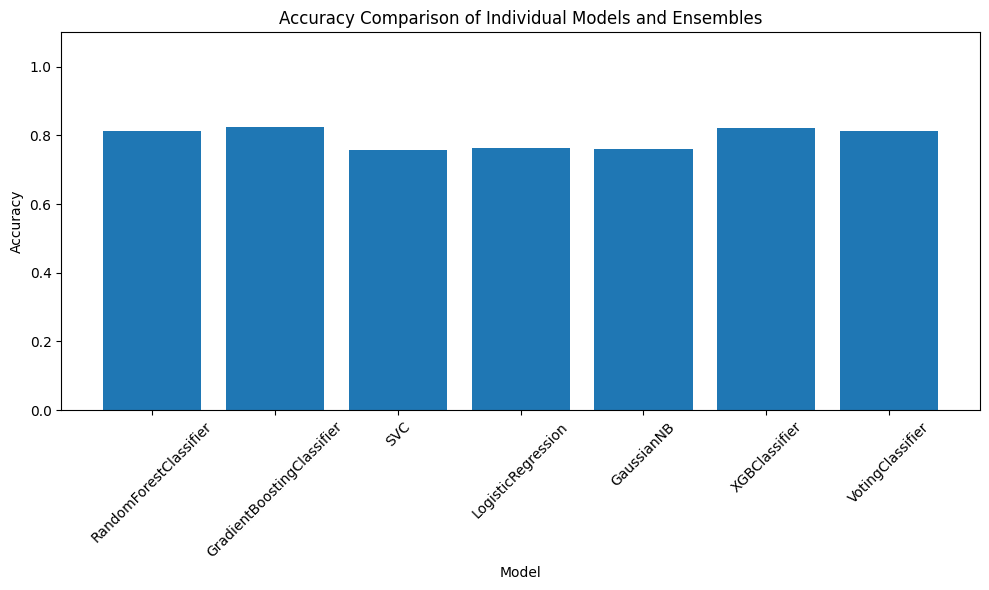

In [21]:
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Individual Models and Ensembles')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


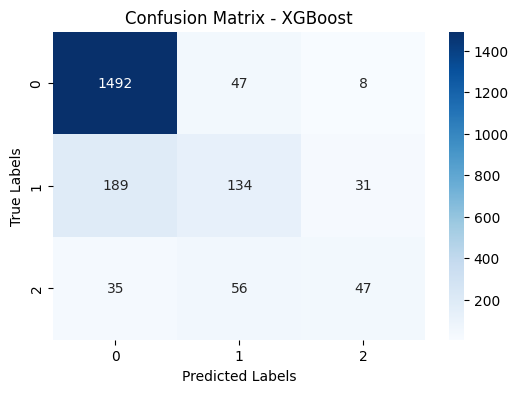

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Create the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XGBoost")
plt.show()


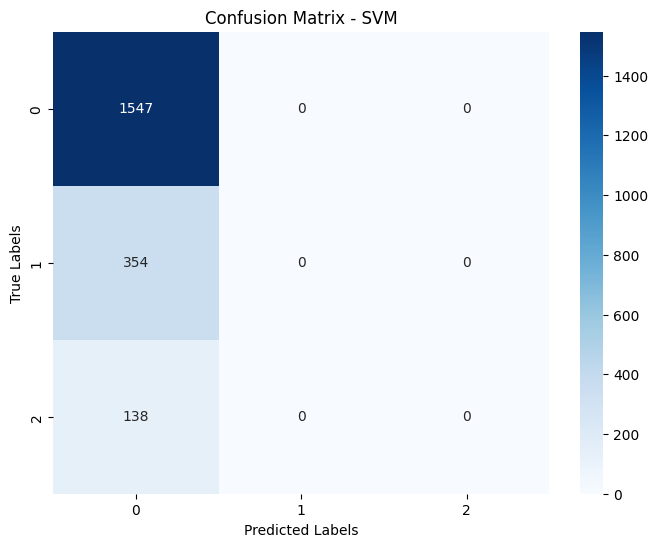

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM")
plt.show()


In [29]:
columns_to_exclude = ["icu_level"]
feature_names = df.drop(columns=columns_to_exclude).columns

In [30]:
feature_importance_rf = random_forest_model.feature_importances_

for feature_name, importance in zip(feature_names, feature_importance_rf):
    print(f"{feature_name}: {importance}")


heartrate_mean: 0.019852401150011002
sysbp_mean: 0.031280815791995174
diasbp_mean: 0.0177616321902365
meanbp_mean: 0.022108334672911956
resprate_mean: 0.020273271155844194
tempc_mean: 0.02158596344027687
spo2_mean: 0.021812232088879537
glucose_mean: 0.017697181196790694
aniongap_mean: 0.02197228389865515
bicarbonate_mean: 0.02423411279576912
creatinine_mean: 0.04630931186012795
chloride_mean: 0.01602275212736076
hematocrit_mean: 0.01627936584536526
hemoglobin_mean: 0.01624634916244293
lactate_mean: 0.02178906960248717
platelet_mean: 0.020110628700167298
potassium_mean: 0.01784120671693184
ptt_mean: 0.0205290326776023
inr_mean: 0.021182986090924852
pt_mean: 0.022869723228345063
sodium_mean: 0.015742188613302316
bun_mean: 0.051917761376767436
wbc_mean: 0.02014361377069061
first_wardid: 0.008722535847883753
last_wardid: 0.009499821452766457
los: 0.022799125836009362
los_hospital: 0.022479557048318298
admission_age: 0.018902414775963418
hospital_expire_flag: 0.018197858060054032
hospstay_s

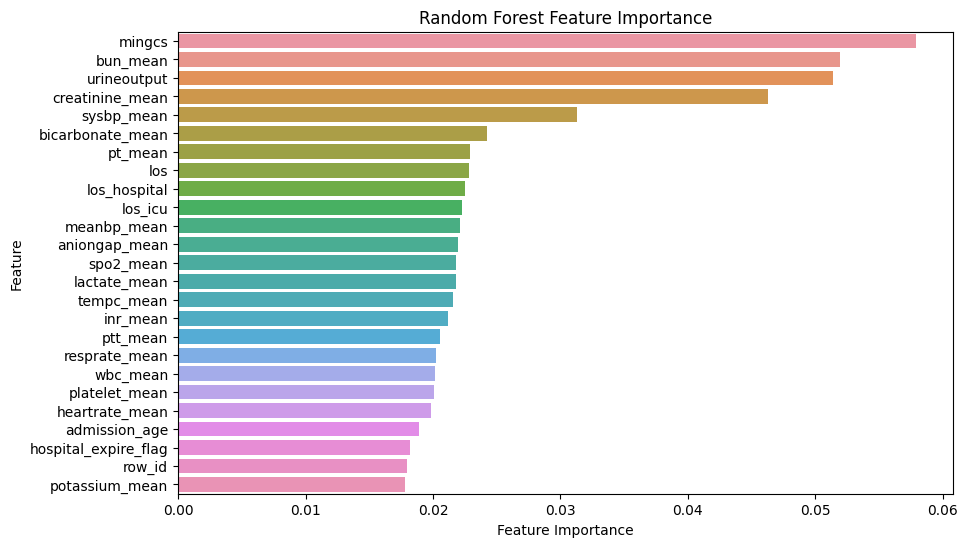

In [37]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(25)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [31]:
feature_importance_gbm = gbm_model.feature_importances_

for feature_name, importance in zip(feature_names, feature_importance_gbm):
    print(f"{feature_name}: {importance}")


heartrate_mean: 0.008574296899368146
sysbp_mean: 0.06285108256550401
diasbp_mean: 0.0026348425831052113
meanbp_mean: 0.005843108618498178
resprate_mean: 0.005935727780079431
tempc_mean: 0.01138350617920271
spo2_mean: 0.019560122194585163
glucose_mean: 0.00555325842772249
aniongap_mean: 0.005275380968984687
bicarbonate_mean: 0.016915140765951246
creatinine_mean: 0.03461741284414599
chloride_mean: 0.002795048277379683
hematocrit_mean: 0.0031351359724531036
hemoglobin_mean: 0.0016097019870481863
lactate_mean: 0.015270329271095428
platelet_mean: 0.009201837509934505
potassium_mean: 0.003629477518901602
ptt_mean: 0.007018651128673106
inr_mean: 0.012354641518989925
pt_mean: 0.014134084724325832
sodium_mean: 0.004960827313759384
bun_mean: 0.17251658002830733
wbc_mean: 0.012029771484409688
first_wardid: 0.00011853563565866301
last_wardid: 0.001385761143224485
los: 0.016691273858299983
los_hospital: 0.014046196435484605
admission_age: 0.01152212428304289
hospital_expire_flag: 0.0620100516985572

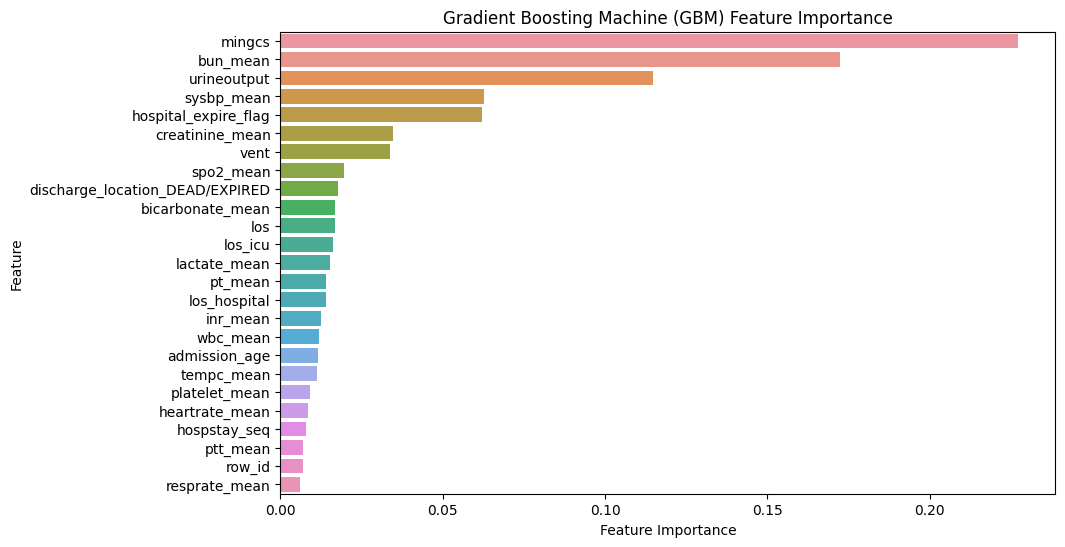

In [40]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_gbm})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(25)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Machine (GBM) Feature Importance')
plt.show()

In [32]:
feature_importance_xgb = xgb_model.get_booster().get_score(importance_type='weight')

# Assuming you have a list of feature names, replace 'feature_names' with your actual feature names
for feature_name, importance in feature_importance_xgb.items():
    print(f"{feature_name}: {importance}")


heartrate_mean: 349.0
sysbp_mean: 463.0
diasbp_mean: 302.0
meanbp_mean: 314.0
resprate_mean: 312.0
tempc_mean: 361.0
spo2_mean: 431.0
glucose_mean: 336.0
aniongap_mean: 272.0
bicarbonate_mean: 264.0
creatinine_mean: 290.0
chloride_mean: 252.0
hematocrit_mean: 198.0
hemoglobin_mean: 202.0
lactate_mean: 322.0
platelet_mean: 386.0
potassium_mean: 289.0
ptt_mean: 351.0
inr_mean: 216.0
pt_mean: 272.0
sodium_mean: 265.0
bun_mean: 445.0
wbc_mean: 419.0
first_wardid: 76.0
last_wardid: 95.0
los: 378.0
los_hospital: 420.0
admission_age: 361.0
hospital_expire_flag: 59.0
hospstay_seq: 94.0
row_id: 372.0
gender: 26.0
mingcs: 350.0
gcsmotor: 80.0
gcsverbal: 65.0
gcseyes: 94.0
endotrachflag: 2.0
urineoutput: 460.0
vent: 98.0
weight: 170.0
weight_admit: 127.0
weight_daily: 241.0
rrt: 3.0
diagnosis_encoded: 192.0
marital_status_DIVORCED: 14.0
marital_status_MARRIED: 20.0
marital_status_SEPARATED: 1.0
marital_status_SINGLE: 26.0
marital_status_UNKNOWN (DEFAULT): 11.0
marital_status_WIDOWED: 13.0
ethnici

In [46]:
len(feature_importance_xgb)

84

In [48]:
len(feature_names)

107

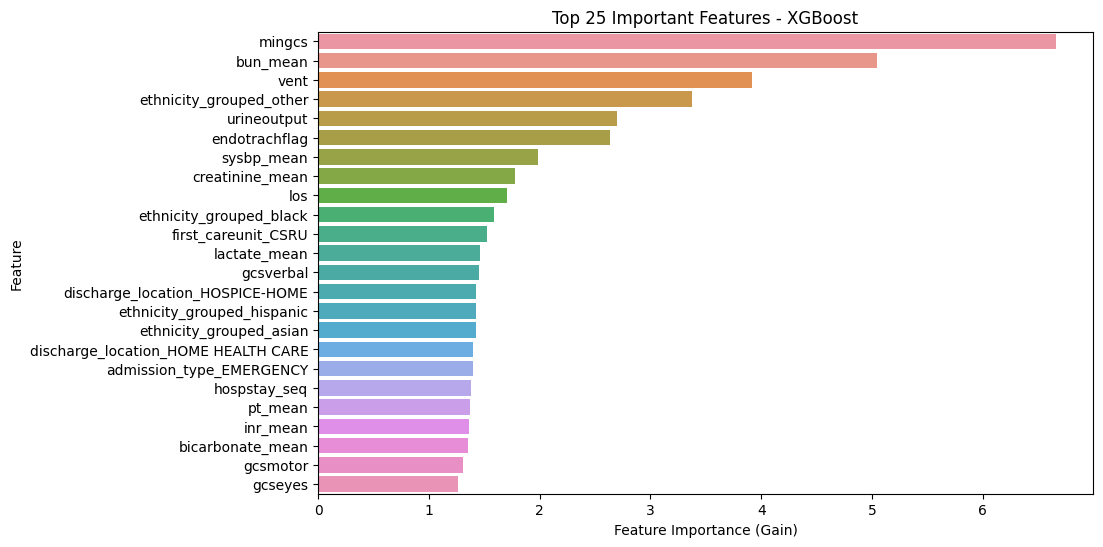

In [52]:
# Get feature importance using 'gain' as an example, but you can change it to 'weight' or 'cover' if needed
feature_importance_xgb = xgb_model.get_booster().get_score(importance_type='gain')

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame.from_dict(feature_importance_xgb, orient='index', columns=['Importance'])
feature_importance_df.reset_index(inplace=True)
feature_importance_df.rename(columns={'index': 'Feature'}, inplace=True)

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 'k' important features
top_k = 25  # Change this number to show more or fewer top features
top_k_features = feature_importance_df.head(top_k)

# Plotting XGBoost feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_k_features[1:top_k])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Feature')
plt.title('Top ' + str(top_k) + ' Important Features - XGBoost')
plt.show()

In [54]:
df_CLUSTERED = pd.read_csv(f'{os.getenv("ROOT_DIR")}\\data\\finalrefinedclustered.csv')
df_CLUSTERED

,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,bicarbonate_mean,...,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,icu_level,GMM_Cluster_UMAP,DBSCAN_Cluster_UMAP,HDBSCAN_Cluster_UMAP,Spectral_Cluster_UMAP
0,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,18.00,...,False,False,True,False,False,2,0,0,18,0
1,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,28.00,...,False,True,False,False,False,0,4,0,34,0
2,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,20.25,...,False,False,True,False,False,1,4,0,34,0
3,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,22.50,...,False,False,False,True,False,0,4,0,63,0
4,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,25.50,...,False,False,True,False,False,0,4,0,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,20.50,...,False,False,True,False,False,0,1,0,19,0
10189,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,21.50,...,False,False,True,False,False,0,3,3,2,3
10190,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,19.75,...,False,False,False,True,False,1,0,0,18,0
10191,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,22.50,...,False,False,True,False,False,0,4,0,63,0


In [57]:
# Step 1: Get the unique cluster labels
unique_clusters = df_CLUSTERED['GMM_Cluster_UMAP'].unique()
unique_clusters

array([0, 4, 3, 2, 1], dtype=int64)

In [58]:
cluster_datasets = {}

In [60]:
for cluster_label in unique_clusters:
    cluster_datasets[cluster_label] = df_CLUSTERED[df_CLUSTERED['GMM_Cluster_UMAP'] == cluster_label]
cluster_datasets    

{0:        heartrate_mean  sysbp_mean  diasbp_mean  meanbp_mean  resprate_mean  \
 0          111.785714  102.960000    55.720000    75.692812      17.361111   
 9          126.879130   91.573333    50.199167    63.990556      29.031667   
 10         112.444444  114.629630    61.518519    79.222208      17.130435   
 13          93.578788  113.874332    62.289661    79.295006      20.113208   
 17          90.646370  157.886744    97.836205   112.894689      18.603299   
 ...               ...         ...          ...          ...            ...   
 10165       59.720000  106.400000    45.100000    60.560976      17.343750   
 10173       62.545455  145.181818    58.454545    85.500000      17.615385   
 10175       91.621773   99.786878    61.534603    69.172381      14.148019   
 10187       97.178571   99.258065    53.322581    67.806452      23.742857   
 10190       95.006944  106.881558    59.216216    72.278219      15.500000   
 
        tempc_mean  spo2_mean  glucose_mean  an

AttributeError: 'numpy.int64' object has no attribute 'keys'

In [67]:
ensemble_models = [
    ('Random Forest', random_forest_model),
    ('GBM', gbm_model),
    ('SVM', svm_model),
    ('Logistic Regression', logistic_regression_model),
    ('Naive Bayes', naive_bayes_model),
    ('XGBoost', xgb_model),
]

In [68]:
hard_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

In [69]:
soft_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

In [70]:
models = [random_forest_model, gbm_model, svm_model,
          logistic_regression_model, naive_bayes_model, xgb_model,
          hard_voting_ensemble, soft_voting_ensemble]

In [88]:
from imblearn.over_sampling import SMOTE

accuracy_scores = {}

for cluster_label, cluster_data in cluster_datasets.items():
    print(f"Training models for Cluster {cluster_label}")
    y = cluster_data['icu_level']
    X = cluster_data.drop(columns=['icu_level'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    for model in models:    
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_name = f"{model.__class__.__name__} (Cluster {cluster_label})"
        accuracy_scores[model_name] = accuracy
        print(f"{model_name} Accuracy: {accuracy:.4f}")

Training models for Cluster 0
RandomForestClassifier (Cluster 0) Accuracy: 0.7728
GradientBoostingClassifier (Cluster 0) Accuracy: 0.7800
SVC (Cluster 0) Accuracy: 0.3900


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression (Cluster 0) Accuracy: 0.6261
GaussianNB (Cluster 0) Accuracy: 0.6923
XGBClassifier (Cluster 0) Accuracy: 0.7764


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 0) Accuracy: 0.7728


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 0) Accuracy: 0.7710
Training models for Cluster 4
RandomForestClassifier (Cluster 4) Accuracy: 0.7211
GradientBoostingClassifier (Cluster 4) Accuracy: 0.7337
SVC (Cluster 4) Accuracy: 0.4322


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression (Cluster 4) Accuracy: 0.5628
GaussianNB (Cluster 4) Accuracy: 0.6859
XGBClassifier (Cluster 4) Accuracy: 0.7211


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 4) Accuracy: 0.7286


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 4) Accuracy: 0.7337
Training models for Cluster 3
RandomForestClassifier (Cluster 3) Accuracy: 0.8930
GradientBoostingClassifier (Cluster 3) Accuracy: 0.8967
SVC (Cluster 3) Accuracy: 0.1255


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression (Cluster 3) Accuracy: 0.6052
GaussianNB (Cluster 3) Accuracy: 0.8266
XGBClassifier (Cluster 3) Accuracy: 0.8893


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 3) Accuracy: 0.8930


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 3) Accuracy: 0.8856
Training models for Cluster 2
RandomForestClassifier (Cluster 2) Accuracy: 0.8453
GradientBoostingClassifier (Cluster 2) Accuracy: 0.8383
SVC (Cluster 2) Accuracy: 0.3937


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression (Cluster 2) Accuracy: 0.6292
GaussianNB (Cluster 2) Accuracy: 0.7399
XGBClassifier (Cluster 2) Accuracy: 0.8471


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 2) Accuracy: 0.8348


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 2) Accuracy: 0.8489
Training models for Cluster 1
RandomForestClassifier (Cluster 1) Accuracy: 0.8852
GradientBoostingClassifier (Cluster 1) Accuracy: 0.8811
SVC (Cluster 1) Accuracy: 0.6270
LogisticRegression (Cluster 1) Accuracy: 0.6025
GaussianNB (Cluster 1) Accuracy: 0.8238


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier (Cluster 1) Accuracy: 0.8811


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 1) Accuracy: 0.8934


d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier (Cluster 1) Accuracy: 0.8730


In [89]:
num = 1
for model, score in accuracy_scores.items():
    if(num == 8):
        print("--------------------")
        print("\n")
        num = 0
    print(model, score)
    num = num + 1

RandomForestClassifier (Cluster 0) 0.7728085867620751
GradientBoostingClassifier (Cluster 0) 0.7799642218246869
SVC (Cluster 0) 0.38998211091234347
LogisticRegression (Cluster 0) 0.6261180679785331
GaussianNB (Cluster 0) 0.6923076923076923
XGBClassifier (Cluster 0) 0.776386404293381
VotingClassifier (Cluster 0) 0.7710196779964222
--------------------


RandomForestClassifier (Cluster 4) 0.7211055276381909
GradientBoostingClassifier (Cluster 4) 0.7336683417085427
SVC (Cluster 4) 0.4321608040201005
LogisticRegression (Cluster 4) 0.5628140703517588
GaussianNB (Cluster 4) 0.6859296482412061
XGBClassifier (Cluster 4) 0.7211055276381909
VotingClassifier (Cluster 4) 0.7336683417085427
RandomForestClassifier (Cluster 3) 0.8929889298892989
--------------------


GradientBoostingClassifier (Cluster 3) 0.8966789667896679
SVC (Cluster 3) 0.12546125461254612
LogisticRegression (Cluster 3) 0.6051660516605166
GaussianNB (Cluster 3) 0.8265682656826568
XGBClassifier (Cluster 3) 0.8892988929889298
Votin